<a href="https://colab.research.google.com/github/abhikbhattacharjee/Bayesian_Modelling_Dissertation/blob/main/Half_Moons_Data/Bayesian_Modelling_HalfMoons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Requisites & Imports

In [1]:
!pip install deepbayes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 1.3 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
import deepbayes
import deepbayes.optimizers as optimizers
import numpy as np
from deepbayes import PosteriorModel
import seaborn as sns

from matplotlib import font_manager
font_path = '/content/NewCM10-Regular.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#Mean and Variance Calculation Function

In [3]:
def my_predict(model, input, n=35):
    if(model.det):
        return model.model(input)
    out = []
    for i in range(n):
        model.model.set_weights(model.sample())
        out.append(model.model(input).numpy())
    return np.mean(out,axis=0), np.var(out,axis=0)

#Half Moons Data Generation

<Axes: >

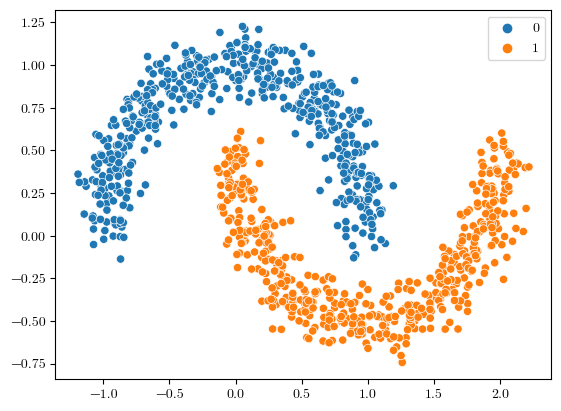

In [4]:
n_samples = 1000
noise = 0.1
x, y = datasets.make_moons(n_samples = n_samples, noise = noise)

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')
# plt.title("Generated Half Moons Data")

#Logistic Regression Setup

In [5]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

y_pred = log_reg.predict(x)

acc_scr = accuracy_score(y, y_pred)

print("Accuracy Score: ", acc_scr)
print("Intercept: ", log_reg.intercept_)
print("Coefficient: ", log_reg.coef_[0])

cnf_matrix = metrics.confusion_matrix(y, y_pred)
print("Confusion Matrix: \n", cnf_matrix)

Accuracy Score:  0.88
Intercept:  [0.74216109]
Coefficient:  [ 1.11744157 -5.13390624]
Confusion Matrix: 
 [[438  62]
 [ 58 442]]


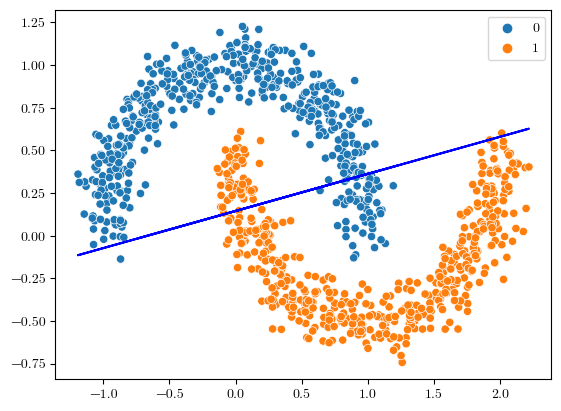

In [6]:
y1 = -(log_reg.intercept_ + (log_reg.coef_[:,0]*x))/log_reg.coef_[:,1]
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')
plt.plot(x, y1, color = 'blue')

#Logistic Prior Setup

<Axes: >

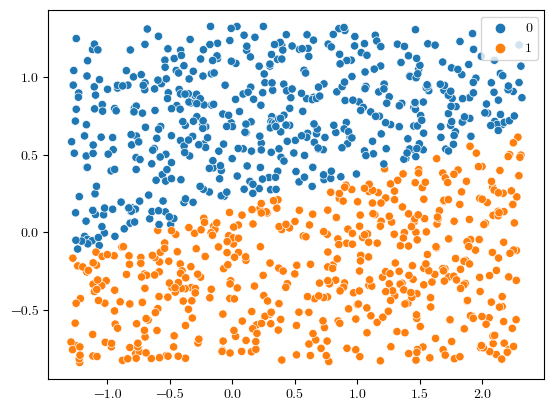

In [7]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
num_samples = 1000

x_samples = np.random.uniform(x_min, x_max, num_samples)
y_samples = np.random.uniform(y_min, y_max, num_samples)

samples = np.column_stack((x_samples, y_samples))

log_target = log_reg.predict(samples)

sns.scatterplot(x=samples[:, 0], y=samples[:, 1], hue=log_target, palette='tab10')
# plt.title("Half Moons Data - Logistic Prior")

#Create Training and Testing Data

In [8]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(samples, log_target, test_size = 0.25, random_state=42)
y_train_new = y_train_new.astype("int64").reshape(-1,1)
y_test_new = y_test_new.astype("int64").reshape(-1,1)

#Bayesian Neural Network Setup - Deepbayes

In [9]:
model_new = Sequential()
model_new.add(Dense(10, input_dim = 2, activation = 'relu'))
model_new.add(Dense(2, activation = 'softmax'))

loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = optimizers.BayesByBackprop()
learning_rate = 0.5

bayes_model_log_prior = opt.compile(model_new, loss_fn = loss, epochs = 50, learning_rate = learning_rate, kl_weight = 4)

This optimizer does not have a default compilation method. Please make sure to call the correct .compile method before use.
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
deepbayes: Using passed loss_fn as the data likelihood in the KL loss


In [10]:
bayes_model_log_prior.train(X_train_new, y_train_new, X_test_new, y_test_new)

100%|██████████| 12/12 [00:02<00:00,  4.63it/s]


Epoch 1, loss: 13.252, acc: 0.520, val_loss: 0.668, val_acc: 0.700


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Epoch 2, loss: 9.299, acc: 0.529, val_loss: 3.141, val_acc: 0.344


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 3, loss: 14.977, acc: 0.467, val_loss: 2.423, val_acc: 0.124


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 4, loss: 18.023, acc: 0.517, val_loss: 2.789, val_acc: 0.536


100%|██████████| 12/12 [00:02<00:00,  4.32it/s]


Epoch 5, loss: 10.470, acc: 0.516, val_loss: 3.153, val_acc: 0.508


100%|██████████| 12/12 [00:05<00:00,  2.34it/s]


Epoch 6, loss: 21.828, acc: 0.525, val_loss: 3.829, val_acc: 0.464


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 7, loss: 11.367, acc: 0.520, val_loss: 2.208, val_acc: 0.420


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 8, loss: 12.422, acc: 0.535, val_loss: 2.701, val_acc: 0.520


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Epoch 9, loss: 13.039, acc: 0.511, val_loss: 2.799, val_acc: 0.464


100%|██████████| 12/12 [00:01<00:00, 11.45it/s]


Epoch 10, loss: 9.604, acc: 0.477, val_loss: 7.681, val_acc: 0.536


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 11, loss: 40.528, acc: 0.477, val_loss: 0.934, val_acc: 0.396


100%|██████████| 12/12 [00:01<00:00, 11.17it/s]


Epoch 12, loss: 38.989, acc: 0.523, val_loss: 4.382, val_acc: 0.464


100%|██████████| 12/12 [00:01<00:00, 11.62it/s]


Epoch 13, loss: 13.855, acc: 0.607, val_loss: 3.412, val_acc: 0.536


100%|██████████| 12/12 [00:01<00:00, 10.82it/s]


Epoch 14, loss: 11.366, acc: 0.453, val_loss: 1.572, val_acc: 0.464


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 15, loss: 16.432, acc: 0.543, val_loss: 2.996, val_acc: 0.464


100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


Epoch 16, loss: 14.875, acc: 0.480, val_loss: 1.300, val_acc: 0.392


100%|██████████| 12/12 [00:01<00:00, 11.12it/s]


Epoch 17, loss: 8.198, acc: 0.421, val_loss: 2.876, val_acc: 0.464


100%|██████████| 12/12 [00:01<00:00, 11.62it/s]


Epoch 18, loss: 18.297, acc: 0.485, val_loss: 3.541, val_acc: 0.504


100%|██████████| 12/12 [00:01<00:00, 11.25it/s]


Epoch 19, loss: 9.887, acc: 0.579, val_loss: 0.985, val_acc: 0.572


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 20, loss: 11.833, acc: 0.567, val_loss: 3.163, val_acc: 0.464


100%|██████████| 12/12 [00:01<00:00, 11.32it/s]


Epoch 21, loss: 17.633, acc: 0.423, val_loss: 1.429, val_acc: 0.316


100%|██████████| 12/12 [00:01<00:00, 11.21it/s]


Epoch 22, loss: 14.215, acc: 0.456, val_loss: 2.447, val_acc: 0.356


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 23, loss: 18.114, acc: 0.524, val_loss: 2.789, val_acc: 0.288


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 24, loss: 14.153, acc: 0.452, val_loss: 1.377, val_acc: 0.512


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Epoch 25, loss: 22.794, acc: 0.413, val_loss: 1.318, val_acc: 0.512


100%|██████████| 12/12 [00:01<00:00, 10.92it/s]


Epoch 26, loss: 9.316, acc: 0.477, val_loss: 1.363, val_acc: 0.536


100%|██████████| 12/12 [00:01<00:00,  9.51it/s]


Epoch 27, loss: 14.371, acc: 0.476, val_loss: 0.968, val_acc: 0.604


100%|██████████| 12/12 [00:01<00:00, 11.10it/s]


Epoch 28, loss: 10.564, acc: 0.556, val_loss: 0.791, val_acc: 0.780


100%|██████████| 12/12 [00:01<00:00, 11.39it/s]


Epoch 29, loss: 10.041, acc: 0.529, val_loss: 1.026, val_acc: 0.580


100%|██████████| 12/12 [00:01<00:00,  9.51it/s]


Epoch 30, loss: 9.711, acc: 0.523, val_loss: 0.991, val_acc: 0.576


100%|██████████| 12/12 [00:01<00:00, 11.32it/s]


Epoch 31, loss: 12.662, acc: 0.483, val_loss: 1.919, val_acc: 0.412


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 32, loss: 12.521, acc: 0.491, val_loss: 1.606, val_acc: 0.432


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 33, loss: 12.234, acc: 0.455, val_loss: 3.082, val_acc: 0.464


100%|██████████| 12/12 [00:01<00:00,  7.61it/s]


Epoch 34, loss: 9.220, acc: 0.477, val_loss: 1.727, val_acc: 0.416


100%|██████████| 12/12 [00:01<00:00, 10.80it/s]


Epoch 35, loss: 12.941, acc: 0.528, val_loss: 2.266, val_acc: 0.360


100%|██████████| 12/12 [00:01<00:00, 11.35it/s]


Epoch 36, loss: 9.117, acc: 0.437, val_loss: 2.322, val_acc: 0.276


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 37, loss: 19.411, acc: 0.461, val_loss: 2.126, val_acc: 0.428


100%|██████████| 12/12 [00:01<00:00,  9.51it/s]


Epoch 38, loss: 12.939, acc: 0.493, val_loss: 0.444, val_acc: 0.800


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 39, loss: 37.795, acc: 0.439, val_loss: 1.565, val_acc: 0.552


100%|██████████| 12/12 [00:01<00:00,  9.87it/s]


Epoch 40, loss: 25.324, acc: 0.472, val_loss: 0.741, val_acc: 0.696


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 41, loss: 24.085, acc: 0.484, val_loss: 1.370, val_acc: 0.536


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 42, loss: 15.695, acc: 0.489, val_loss: 2.752, val_acc: 0.464


100%|██████████| 12/12 [00:01<00:00,  7.75it/s]


Epoch 43, loss: 10.336, acc: 0.447, val_loss: 1.808, val_acc: 0.324


100%|██████████| 12/12 [00:01<00:00,  8.14it/s]


Epoch 44, loss: 12.214, acc: 0.539, val_loss: 3.480, val_acc: 0.536


100%|██████████| 12/12 [00:01<00:00,  9.46it/s]


Epoch 45, loss: 28.135, acc: 0.477, val_loss: 3.405, val_acc: 0.264


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 46, loss: 12.847, acc: 0.572, val_loss: 2.311, val_acc: 0.440


100%|██████████| 12/12 [00:01<00:00, 10.89it/s]


Epoch 47, loss: 10.989, acc: 0.489, val_loss: 1.159, val_acc: 0.280


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 48, loss: 10.232, acc: 0.531, val_loss: 0.733, val_acc: 0.492


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 49, loss: 15.186, acc: 0.549, val_loss: 2.343, val_acc: 0.464


100%|██████████| 12/12 [00:01<00:00,  9.48it/s]

Epoch 50, loss: 11.181, acc: 0.512, val_loss: 0.744, val_acc: 0.632


#Prediction Mean and Variance

In [11]:
prediction_mean,prediction_variance = my_predict(bayes_model_log_prior,X_train_new)
print("Prediction Mean: ", prediction_mean)
print("Prediction Variance: ", prediction_variance)

Prediction Mean:  [[0.65150744 0.34849256]
 [0.5848674  0.4151327 ]
 [0.52817816 0.4718218 ]
 ...
 [0.6489958  0.35100415]
 [0.66262645 0.33737358]
 [0.63262427 0.36737564]]
Prediction Variance:  [[0.10049686 0.10049687]
 [0.10119243 0.10119241]
 [0.13167948 0.13167948]
 ...
 [0.13706301 0.13706301]
 [0.11615036 0.11615035]
 [0.15045097 0.150451  ]]


#Model Save and Reload

In [12]:
bayes_model_log_prior.save("PosteriorModels/model")
del bayes_model_log_prior

/usr/local/lib/python3.10/dist-packages/deepbayes/optimizers/bayesbybackprop.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(path+"/mean", np.asarray(self.posterior_mean))
/usr/local/lib/python3.10/dist-packages/deepbayes/optimizers/bayesbybackprop.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(path+"/var", np.asarray(var))


In [13]:
retrain_model = PosteriorModel("PosteriorModels/model")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
BayesKeras detected the above model 
 None


#Model Retrain on Actual Half Moons Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

y_train = y_train.astype("float32").reshape(-1,1)
y_test = y_test.astype("float32").reshape(-1,1)

In [15]:
bayes_model = opt.compile(model_new, loss_fn=loss, learning_rate = 0.9, epochs=100)
bayes_model.posterior_mean = retrain_model.posterior_mean.tolist()
bayes_model.posterior_var = retrain_model.posterior_var.tolist()
bayes_model.train(X_train, y_train, X_test, y_test)

BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
deepbayes: Using passed loss_fn as the data likelihood in the KL loss


100%|██████████| 13/13 [00:01<00:00, 10.19it/s]


Epoch 1, loss: 4.275, acc: 0.477, val_loss: 1.418, val_acc: 0.630


100%|██████████| 13/13 [00:01<00:00,  7.28it/s]


Epoch 2, loss: 2.424, acc: 0.614, val_loss: 1.041, val_acc: 0.785


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 3, loss: 3.202, acc: 0.549, val_loss: 2.310, val_acc: 0.570


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 4, loss: 2.431, acc: 0.611, val_loss: 0.801, val_acc: 0.765


100%|██████████| 13/13 [00:01<00:00, 10.85it/s]


Epoch 5, loss: 2.809, acc: 0.624, val_loss: 0.896, val_acc: 0.620


100%|██████████| 13/13 [00:01<00:00, 11.38it/s]


Epoch 6, loss: 2.755, acc: 0.603, val_loss: 0.692, val_acc: 0.450


100%|██████████| 13/13 [00:01<00:00, 11.12it/s]


Epoch 7, loss: 2.333, acc: 0.620, val_loss: 1.361, val_acc: 0.455


100%|██████████| 13/13 [00:01<00:00, 11.15it/s]


Epoch 8, loss: 2.605, acc: 0.570, val_loss: 0.913, val_acc: 0.655


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 9, loss: 2.427, acc: 0.594, val_loss: 1.175, val_acc: 0.640


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 10, loss: 2.604, acc: 0.605, val_loss: 1.914, val_acc: 0.475


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 11, loss: 2.384, acc: 0.679, val_loss: 0.661, val_acc: 0.560


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 12, loss: 2.383, acc: 0.639, val_loss: 0.760, val_acc: 0.805


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 13, loss: 2.678, acc: 0.641, val_loss: 2.334, val_acc: 0.480


100%|██████████| 13/13 [00:01<00:00, 10.97it/s]


Epoch 14, loss: 2.725, acc: 0.650, val_loss: 0.702, val_acc: 0.695


100%|██████████| 13/13 [00:01<00:00, 11.18it/s]


Epoch 15, loss: 2.286, acc: 0.608, val_loss: 1.550, val_acc: 0.300


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 16, loss: 2.638, acc: 0.636, val_loss: 0.303, val_acc: 0.875


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 17, loss: 3.061, acc: 0.608, val_loss: 0.394, val_acc: 0.845


100%|██████████| 13/13 [00:01<00:00, 11.32it/s]


Epoch 18, loss: 2.877, acc: 0.741, val_loss: 0.750, val_acc: 0.730


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 19, loss: 1.870, acc: 0.671, val_loss: 1.247, val_acc: 0.465


100%|██████████| 13/13 [00:01<00:00, 10.65it/s]


Epoch 20, loss: 3.762, acc: 0.596, val_loss: 0.509, val_acc: 0.790


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 21, loss: 3.030, acc: 0.582, val_loss: 0.534, val_acc: 0.720


100%|██████████| 13/13 [00:02<00:00,  6.23it/s]


Epoch 22, loss: 2.573, acc: 0.613, val_loss: 0.285, val_acc: 0.835


100%|██████████| 13/13 [00:01<00:00, 10.27it/s]


Epoch 23, loss: 2.264, acc: 0.681, val_loss: 0.793, val_acc: 0.555


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 24, loss: 2.172, acc: 0.636, val_loss: 0.345, val_acc: 0.820


100%|██████████| 13/13 [00:01<00:00, 11.54it/s]


Epoch 25, loss: 3.871, acc: 0.637, val_loss: 0.480, val_acc: 0.810


100%|██████████| 13/13 [00:01<00:00, 10.27it/s]


Epoch 26, loss: 3.126, acc: 0.591, val_loss: 0.422, val_acc: 0.780


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 27, loss: 2.076, acc: 0.635, val_loss: 0.547, val_acc: 0.730


100%|██████████| 13/13 [00:01<00:00, 11.05it/s]


Epoch 28, loss: 5.348, acc: 0.649, val_loss: 0.632, val_acc: 0.830


100%|██████████| 13/13 [00:01<00:00, 10.23it/s]


Epoch 29, loss: 2.121, acc: 0.683, val_loss: 0.226, val_acc: 0.880


100%|██████████| 13/13 [00:01<00:00, 11.23it/s]


Epoch 30, loss: 2.143, acc: 0.680, val_loss: 0.505, val_acc: 0.800


100%|██████████| 13/13 [00:01<00:00, 11.41it/s]


Epoch 31, loss: 1.979, acc: 0.705, val_loss: 1.504, val_acc: 0.550


100%|██████████| 13/13 [00:01<00:00, 11.47it/s]


Epoch 32, loss: 2.161, acc: 0.675, val_loss: 1.292, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 11.55it/s]


Epoch 33, loss: 2.438, acc: 0.706, val_loss: 0.544, val_acc: 0.660


100%|██████████| 13/13 [00:01<00:00,  6.79it/s]


Epoch 34, loss: 2.308, acc: 0.723, val_loss: 0.422, val_acc: 0.780


100%|██████████| 13/13 [00:05<00:00,  2.55it/s]


Epoch 35, loss: 3.751, acc: 0.621, val_loss: 0.391, val_acc: 0.850


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 36, loss: 2.728, acc: 0.666, val_loss: 0.332, val_acc: 0.850


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 37, loss: 1.913, acc: 0.664, val_loss: 1.303, val_acc: 0.320


100%|██████████| 13/13 [00:01<00:00, 10.73it/s]


Epoch 38, loss: 1.892, acc: 0.712, val_loss: 0.420, val_acc: 0.820


100%|██████████| 13/13 [00:01<00:00, 11.77it/s]


Epoch 39, loss: 2.450, acc: 0.551, val_loss: 2.252, val_acc: 0.455


100%|██████████| 13/13 [00:01<00:00, 10.25it/s]


Epoch 40, loss: 2.237, acc: 0.697, val_loss: 0.307, val_acc: 0.860


100%|██████████| 13/13 [00:01<00:00, 10.90it/s]


Epoch 41, loss: 2.631, acc: 0.586, val_loss: 0.405, val_acc: 0.810


100%|██████████| 13/13 [00:01<00:00,  8.21it/s]


Epoch 42, loss: 1.996, acc: 0.668, val_loss: 1.363, val_acc: 0.735


100%|██████████| 13/13 [00:01<00:00,  8.72it/s]


Epoch 43, loss: 2.588, acc: 0.709, val_loss: 0.565, val_acc: 0.615


100%|██████████| 13/13 [00:01<00:00, 11.38it/s]


Epoch 44, loss: 4.292, acc: 0.637, val_loss: 1.388, val_acc: 0.535


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 45, loss: 2.182, acc: 0.726, val_loss: 2.310, val_acc: 0.475


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 46, loss: 2.799, acc: 0.585, val_loss: 0.791, val_acc: 0.700


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 47, loss: 2.720, acc: 0.581, val_loss: 1.607, val_acc: 0.650


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 48, loss: 2.762, acc: 0.555, val_loss: 0.602, val_acc: 0.720


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 49, loss: 3.748, acc: 0.701, val_loss: 0.577, val_acc: 0.820


100%|██████████| 13/13 [00:01<00:00, 11.14it/s]


Epoch 50, loss: 2.859, acc: 0.654, val_loss: 1.654, val_acc: 0.660


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 51, loss: 2.341, acc: 0.681, val_loss: 0.617, val_acc: 0.630


100%|██████████| 13/13 [00:01<00:00, 11.14it/s]


Epoch 52, loss: 2.664, acc: 0.674, val_loss: 1.780, val_acc: 0.625


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 53, loss: 2.375, acc: 0.673, val_loss: 0.387, val_acc: 0.790


100%|██████████| 13/13 [00:01<00:00, 11.26it/s]


Epoch 54, loss: 2.712, acc: 0.615, val_loss: 1.379, val_acc: 0.565


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 55, loss: 1.909, acc: 0.658, val_loss: 1.852, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 11.03it/s]


Epoch 56, loss: 2.360, acc: 0.621, val_loss: 0.849, val_acc: 0.295


100%|██████████| 13/13 [00:01<00:00, 11.35it/s]


Epoch 57, loss: 2.891, acc: 0.652, val_loss: 0.524, val_acc: 0.760


100%|██████████| 13/13 [00:01<00:00, 10.27it/s]


Epoch 58, loss: 2.723, acc: 0.702, val_loss: 0.663, val_acc: 0.705


100%|██████████| 13/13 [00:01<00:00, 10.45it/s]


Epoch 59, loss: 2.061, acc: 0.678, val_loss: 0.387, val_acc: 0.870


100%|██████████| 13/13 [00:02<00:00,  5.10it/s]


Epoch 60, loss: 2.310, acc: 0.688, val_loss: 0.741, val_acc: 0.745


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 61, loss: 2.531, acc: 0.618, val_loss: 0.459, val_acc: 0.780


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 62, loss: 2.370, acc: 0.620, val_loss: 2.362, val_acc: 0.345


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 63, loss: 1.737, acc: 0.735, val_loss: 0.383, val_acc: 0.845


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 64, loss: 2.176, acc: 0.651, val_loss: 1.500, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 11.06it/s]


Epoch 65, loss: 2.433, acc: 0.697, val_loss: 0.464, val_acc: 0.795


100%|██████████| 13/13 [00:01<00:00, 10.94it/s]


Epoch 66, loss: 2.362, acc: 0.669, val_loss: 1.354, val_acc: 0.805


100%|██████████| 13/13 [00:01<00:00, 10.92it/s]


Epoch 67, loss: 3.011, acc: 0.610, val_loss: 3.448, val_acc: 0.175


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 68, loss: 2.343, acc: 0.692, val_loss: 0.879, val_acc: 0.795


100%|██████████| 13/13 [00:01<00:00, 10.26it/s]


Epoch 69, loss: 2.699, acc: 0.647, val_loss: 0.526, val_acc: 0.835


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 70, loss: 2.106, acc: 0.759, val_loss: 0.648, val_acc: 0.700


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 71, loss: 1.661, acc: 0.719, val_loss: 2.041, val_acc: 0.455


100%|██████████| 13/13 [00:01<00:00, 10.27it/s]


Epoch 72, loss: 4.082, acc: 0.581, val_loss: 1.844, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 73, loss: 4.547, acc: 0.620, val_loss: 0.645, val_acc: 0.705


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 74, loss: 2.402, acc: 0.609, val_loss: 0.685, val_acc: 0.720


100%|██████████| 13/13 [00:01<00:00, 10.85it/s]


Epoch 75, loss: 2.654, acc: 0.625, val_loss: 1.086, val_acc: 0.455


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 76, loss: 2.600, acc: 0.596, val_loss: 1.766, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 77, loss: 3.362, acc: 0.613, val_loss: 1.901, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 78, loss: 2.158, acc: 0.664, val_loss: 0.693, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 79, loss: 2.534, acc: 0.673, val_loss: 1.121, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 80, loss: 2.676, acc: 0.594, val_loss: 2.380, val_acc: 0.455


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 81, loss: 2.164, acc: 0.509, val_loss: 0.629, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.85it/s]


Epoch 82, loss: 2.217, acc: 0.566, val_loss: 2.411, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 83, loss: 3.422, acc: 0.664, val_loss: 0.273, val_acc: 0.850


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 84, loss: 2.684, acc: 0.733, val_loss: 0.321, val_acc: 0.860


100%|██████████| 13/13 [00:01<00:00, 10.95it/s]


Epoch 85, loss: 1.916, acc: 0.576, val_loss: 0.489, val_acc: 0.790


100%|██████████| 13/13 [00:01<00:00, 11.23it/s]


Epoch 86, loss: 2.888, acc: 0.632, val_loss: 0.275, val_acc: 0.875


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 87, loss: 2.937, acc: 0.586, val_loss: 0.883, val_acc: 0.810


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 88, loss: 2.186, acc: 0.684, val_loss: 1.268, val_acc: 0.455


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 89, loss: 2.413, acc: 0.609, val_loss: 0.568, val_acc: 0.725


100%|██████████| 13/13 [00:01<00:00, 11.08it/s]


Epoch 90, loss: 2.888, acc: 0.651, val_loss: 0.544, val_acc: 0.695


100%|██████████| 13/13 [00:01<00:00, 11.16it/s]


Epoch 91, loss: 2.428, acc: 0.598, val_loss: 0.368, val_acc: 0.860


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 92, loss: 2.143, acc: 0.591, val_loss: 1.297, val_acc: 0.455


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 93, loss: 2.262, acc: 0.632, val_loss: 1.525, val_acc: 0.515


100%|██████████| 13/13 [00:01<00:00, 11.25it/s]


Epoch 94, loss: 1.916, acc: 0.696, val_loss: 1.335, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 11.19it/s]


Epoch 95, loss: 2.282, acc: 0.619, val_loss: 0.815, val_acc: 0.540


100%|██████████| 13/13 [00:01<00:00, 11.33it/s]


Epoch 96, loss: 2.174, acc: 0.640, val_loss: 2.385, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 11.16it/s]


Epoch 97, loss: 2.499, acc: 0.618, val_loss: 1.590, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 11.11it/s]


Epoch 98, loss: 3.797, acc: 0.615, val_loss: 1.112, val_acc: 0.625


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 99, loss: 3.028, acc: 0.650, val_loss: 0.342, val_acc: 0.845


100%|██████████| 13/13 [00:01<00:00, 11.20it/s]

Epoch 100, loss: 2.320, acc: 0.707, val_loss: 0.553, val_acc: 0.760


#Prediction Plots (Actual Predictions, Mean and Variance)

In [16]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
num_points = 1000

x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x, y)
samples = np.column_stack((X.flatten(), Y.flatten()))

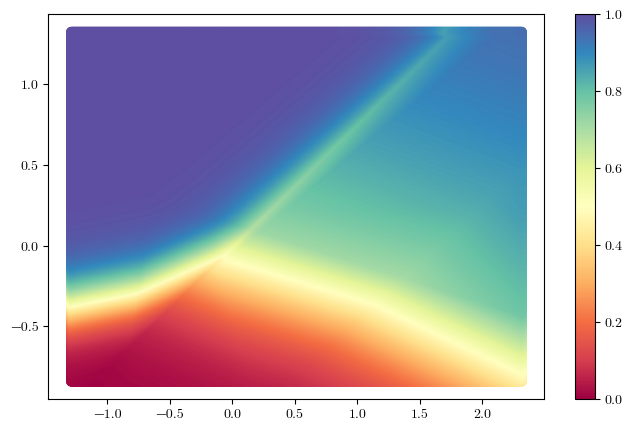

In [17]:
test2 = bayes_model.predict(samples)
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=test2[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
plt.colorbar(scatter)

In [18]:
prediction_mean,prediction_variance = my_predict(bayes_model,samples)
print("Prediction Mean: ", prediction_mean)
print("Prediction Variance: ", prediction_variance)

Prediction Mean:  [[0.36250392 0.63749605]
 [0.36209637 0.6379035 ]
 [0.36168677 0.6383131 ]
 ...
 [0.3429049  0.65709513]
 [0.34247467 0.6575253 ]
 [0.34204444 0.6579556 ]]
Prediction Variance:  [[0.16215149 0.16215147]
 [0.16198038 0.16198033]
 [0.16180682 0.16180682]
 ...
 [0.15378922 0.15378919]
 [0.15365107 0.15365104]
 [0.15351343 0.15351343]]


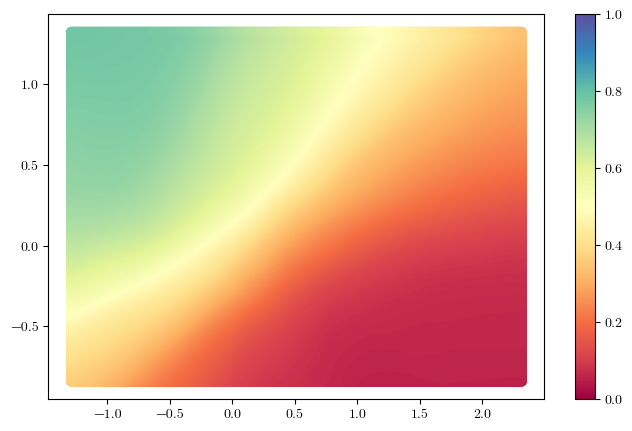

In [19]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# scatter1 = axes[0].scatter(*samples.T, c=prediction_mean[:, 0], cmap=plt.cm.jet)
# axes[0].set_title('Mean - Class 0')
# fig.colorbar(scatter1, ax=axes[0])

# scatter2 = axes[1].scatter(*samples.T, c=prediction_mean[:, 1], cmap=plt.cm.jet)
# axes[1].set_title('Mean - Class 1')
# fig.colorbar(scatter2, ax=axes[1])

# plt.tight_layout()

plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=prediction_mean[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
plt.colorbar(scatter)

In [20]:
# plt.figure(figsize=(8,5))
# scatter = plt.scatter(*samples.T, c=prediction_mean[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
# plt.colorbar(scatter)
# sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')
# plt.title("Generated Half Moons Data")
# plt.show()

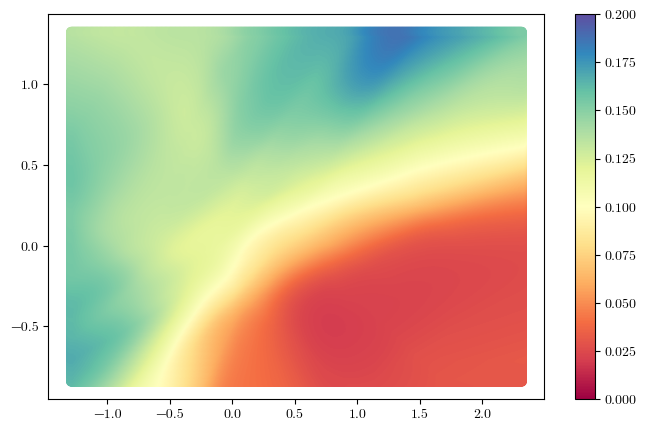

In [21]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=prediction_variance[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 0.2)
plt.colorbar(scatter)

In [22]:
test3 = bayes_model.predict(X_test)
test3 = tf.where(test3[:, 0] > test3[:, 1], 0, 1)
test3 = tf.expand_dims(test3, axis=1)
print("Accuracy Score: ", accuracy_score(y_test, test3))

Accuracy Score:  0.79


In [23]:
testNew = bayes_model.predict(X_test)
testNew

<tf.Tensor: shape=(200, 2), dtype=float32, numpy=
array([[9.83459175e-01, 1.65409259e-02],
       [1.43143145e-04, 9.99856949e-01],
       [1.21718496e-01, 8.78281534e-01],
       [1.66955369e-03, 9.98330414e-01],
       [9.99496043e-01, 5.03872463e-04],
       [3.77909723e-03, 9.96220887e-01],
       [3.02461103e-05, 9.99969661e-01],
       [2.40455866e-01, 7.59544134e-01],
       [9.98253286e-01, 1.74666790e-03],
       [3.61716193e-05, 9.99963820e-01],
       [1.84589917e-05, 9.99981463e-01],
       [1.55905564e-03, 9.98440981e-01],
       [3.32942072e-05, 9.99966681e-01],
       [1.86107517e-03, 9.98138905e-01],
       [3.69255501e-03, 9.96307492e-01],
       [7.97290262e-03, 9.92027104e-01],
       [2.95857992e-02, 9.70414162e-01],
       [1.40304764e-04, 9.99859810e-01],
       [9.99528944e-01, 4.71009553e-04],
       [2.74599704e-04, 9.99725461e-01],
       [2.65570544e-03, 9.97344315e-01],
       [9.99832869e-01, 1.67183432e-04],
       [2.32037128e-05, 9.99976695e-01],
       

# Accuracy Plots

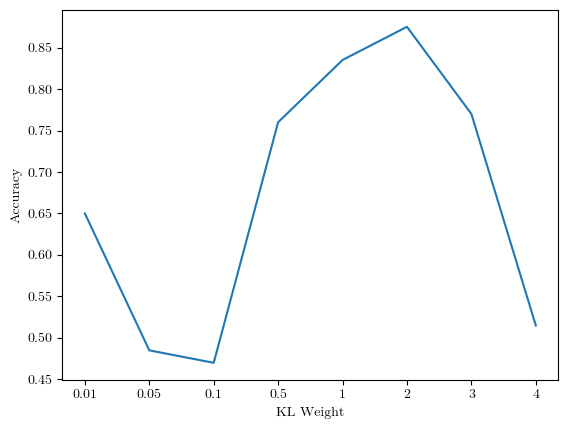

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

kl_weight = [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4]
accuracy = [0.65, 0.485, 0.47, 0.76, 0.835, 0.875, 0.77, 0.515]

data = {'KL Weight': kl_weight, 'Accuracy': accuracy}
df = pd.DataFrame(data)

x_ticks = np.linspace(0, len(kl_weight) - 1, len(kl_weight))

sns.lineplot(x=x_ticks, y='Accuracy', data=df)

plt.xticks(x_ticks, kl_weight)

# plt.title('Accuracy vs. KL Weight')
plt.xlabel('KL Weight')
plt.ylabel('Accuracy')
plt.show()